### DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
gold = pd.read_csv(r"C:\Users\91859\OneDrive\Desktop\gold_price_data.csv")

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold.shape

(2290, 6)

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold["Date"] = pd.to_datetime(gold["Date"])

In [10]:
gold["Year"] = gold["Date"].dt.year
gold["Month"] = gold["Date"].dt.month
gold["Day"] = gold["Date"].dt.day
gold["DayOfWeek"] = gold["Date"].dt.dayofweek  # 0 = Monday, 6 = Sunday
gold["Quarter"] = gold["Date"].dt.quarter

In [11]:
#Drop Original Date Column
gold = gold.drop(columns=["Date"])

In [12]:
gold.head()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day,DayOfWeek,Quarter
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2,2,1
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3,3,1
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4,4,1
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7,0,1
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8,1,1


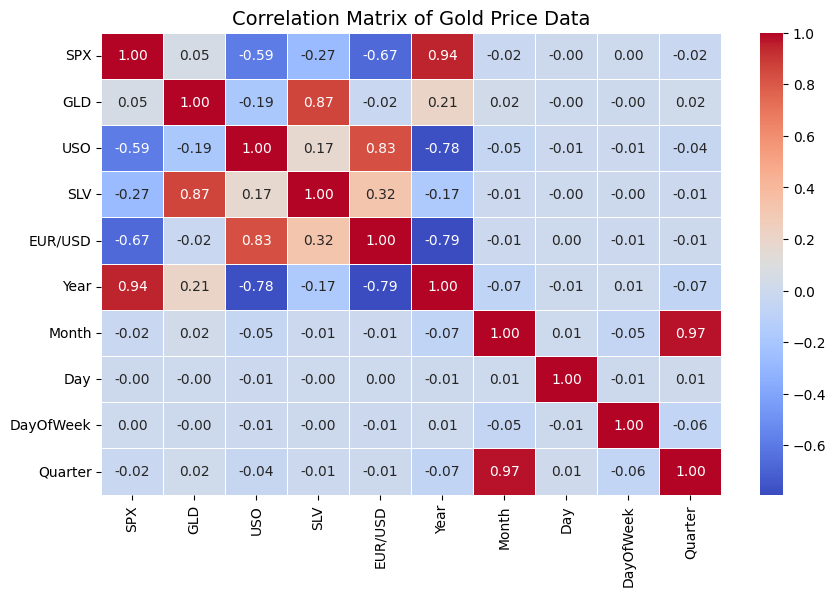

In [13]:
# Correlation Matrix
correlation = gold.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.title("Correlation Matrix of Gold Price Data",fontsize=14)
plt.show()

In [14]:
print(correlation["GLD"])

SPX          0.049345
GLD          1.000000
USO         -0.186360
SLV          0.866632
EUR/USD     -0.024375
Year         0.206654
Month        0.020494
Day         -0.000198
DayOfWeek   -0.001227
Quarter      0.018193
Name: GLD, dtype: float64


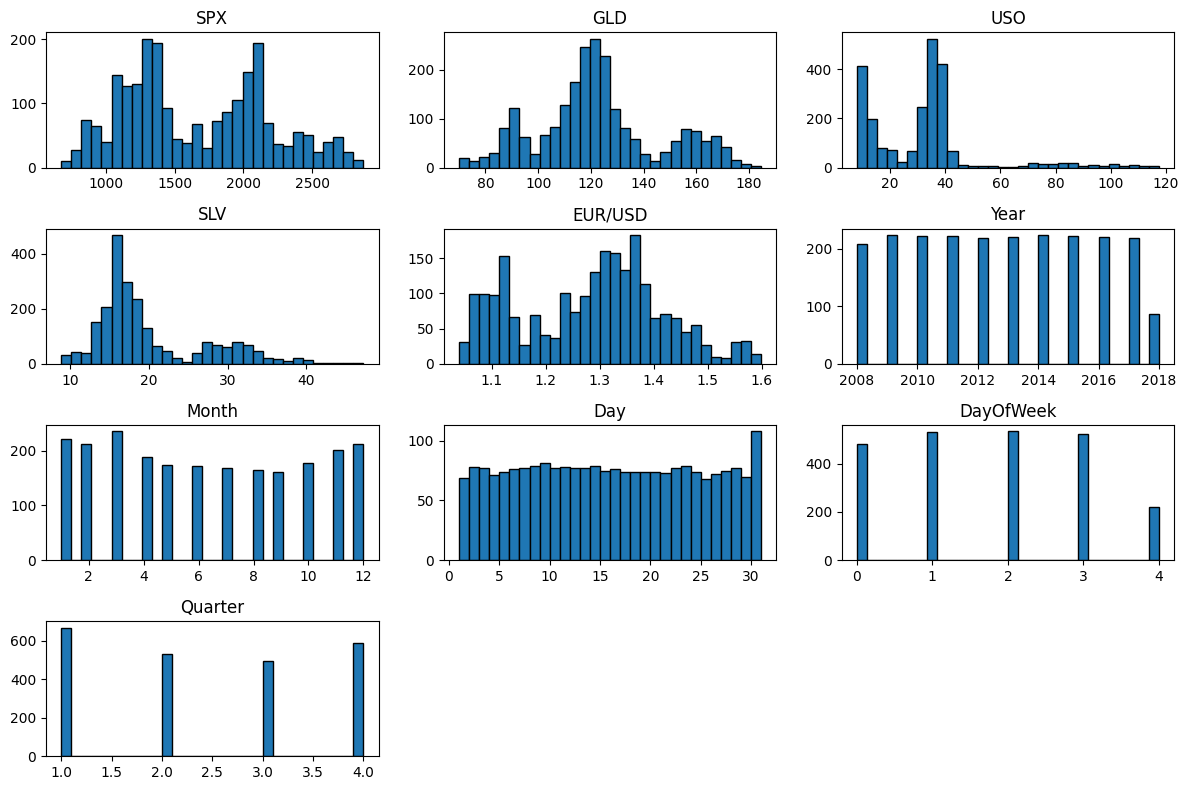

In [15]:
# Plot histograms for each feature
gold.hist(figsize=(12, 8), bins=30, grid=False, edgecolor='black')

plt.tight_layout()
plt.show()

<Axes: xlabel='GLD', ylabel='Count'>

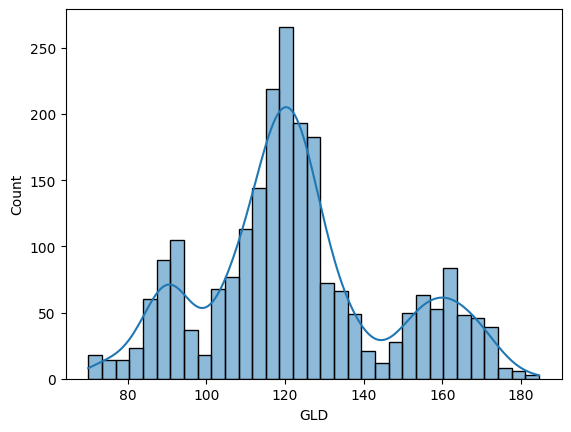

In [16]:
sns.histplot(gold["GLD"], kde=True)

In [17]:
corr_matrix = gold.corr()
print(corr_matrix["GLD"].sort_values(ascending=False))

GLD          1.000000
SLV          0.866632
Year         0.206654
SPX          0.049345
Month        0.020494
Quarter      0.018193
Day         -0.000198
DayOfWeek   -0.001227
EUR/USD     -0.024375
USO         -0.186360
Name: GLD, dtype: float64


In [18]:
# Keeping only relevant features
relevant_features = ['SLV', 'Year', 'SPX']

# Creating a new DataFrame with only the relevant features and target variable 'GLD'
gold_relevant = gold[relevant_features + ['GLD']]

# Display the first few rows of the new DataFrame
print(gold_relevant.head())

      SLV  Year          SPX        GLD
0  15.180  2008  1447.160034  84.860001
1  15.285  2008  1447.160034  85.570000
2  15.167  2008  1411.630005  85.129997
3  15.053  2008  1416.180054  84.769997
4  15.590  2008  1390.189941  86.779999


In [19]:
# Splitting the data into features (X) and target (y)
X = gold_relevant.drop(columns=['GLD'])
y = gold_relevant['GLD']

### Random Forest

In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [22]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Model Performance Evaluation

In [23]:
# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9880618040096447


In [24]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows
print(comparison_df.head())

          Actual   Predicted
2178  122.320000  122.573600
1271  129.899994  130.325004
1268  126.980003  128.477000
44     96.500000   96.708697
2025  117.580002  117.665001


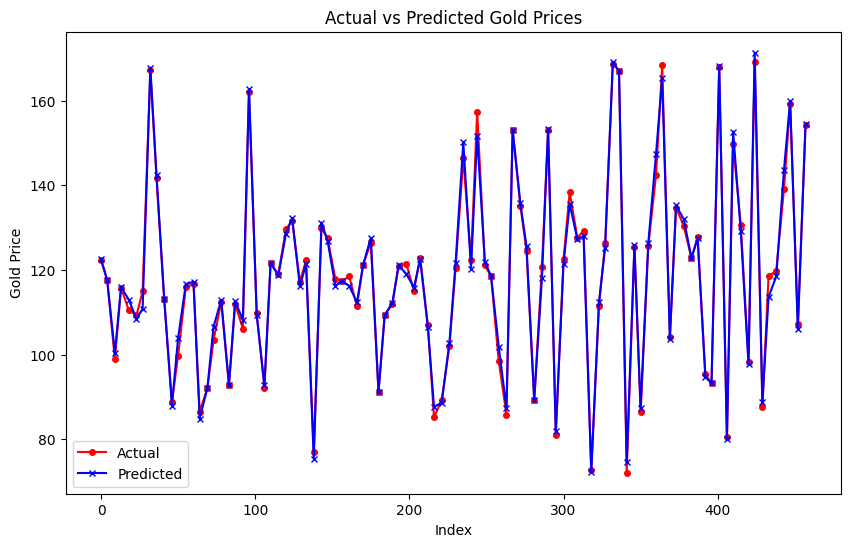

In [25]:
# Sampling a subset of data points to avoid cluttering
sample_size = 100  # You can adjust this to reduce the number of data points
sampled_indices = np.linspace(0, len(y_test) - 1, sample_size).astype(int)

# Line plot: Actual vs Predicted Gold Prices
plt.figure(figsize=(10, 6))

# Plotting actual values (red) and predicted values (blue)
plt.plot(sampled_indices, y_test.iloc[sampled_indices], label="Actual", color='red', marker='o', markersize=4)
plt.plot(sampled_indices, y_pred[sampled_indices], label="Predicted", color='blue', marker='x', markersize=4)

# Adding labels and title
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Index")
plt.ylabel("Gold Price")
plt.legend()

# Display the plot
plt.show()